<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/mathwithpython01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

1. ハードディスクの中に`mathwithpython01.ipynb`というのがあったので、見ているところ。
1. `Colab`で実験しながら読むことを想定したノートブックとする。
1. `LaTeX`、`%%latex`で数式を書く方法は、このノートブックと同じレポジトリーにある`learninglatex.ipynb`を駆け足で読むとよい。
1. 本家`SymPy Tutorial` (https://docs.sympy.org/latest/tutorial/index.html#tutorial)
1. 入力例で学ぶPython(SymPy)の使い方(入門) (https://pianofisica.hatenablog.com/entry/2019/04/04/183712)
1. `Doing Math With Python` PDF ( http://index-of.es/Varios-2/Doing%20Math%20with%20Python.pdf)
1. `Doing Math With Python` site (http://www.nostarch.com/doingmathwithpython/ )

# はじめに

数学と言っても広い話で、調べながらいろんな話題に進んでしまうとは思うものの、とりあえず思いついたことを書いておくと、興味の対象がわかっていいと思うので書いておく。

1. 数式。数学において数式を数学の世界で普通なように書くことは大事だと思う。$x^2$を `x**2` と書くとき、何が違うかというとフォントが違う、記号が違う。いまは$¥LaTeX$で書いたが、フォントと記号は満足させたが、こんどは記号の持つ意味合いから離れてしまっている。
1. 数式演算。$x$に数を代入することはプログラミングでできて、手続き的にいろいろ複雑な計算もできるが、数式を数式自体で操作して、概念を抽象化して考えることが数学の本質の一部である。この辺が `sympy` なのだろうが、どこまでできるのか。
1. 普通の四則演算。日常的に例えば、足し算をしたいとするとき、`sum([123, 456, 789])` と書くが、`numpy` とかを使えば、いろんなことが簡単に計算できるのか。
1. Colabではテキストセルでは$¥LaTeX$、コードセルでは `sympy` で書くが、セルコマンドの `%%latex` も併用する。
1. 図はどうするのか。`matplotlib` で描くのか。



# 最初の例

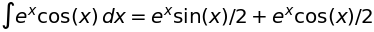

In [1]:
from sympy import *
init_printing()

x = symbols ('x')
a = Integral (cos(x) *  exp(x), x)
Eq (a, a.doit())

えっと、これは`SymPy Tutorialの最初にある例だが、これからなにがわかるか。

1. `from sympy import *` でこれ以降なにも断らずに四則演算をふくめ数学記号がsympyの演算子になっているということか。 => いま `3 / 2` を実行したら、`1.5`ではあるが、出力欄にセンタリングされて出た。たぶんLaTeXの出力っぽいフォントになっている。
1. `x = symbols('x')` はなるほどね。Pythonと共存するので、なんらかの宣言が必要なのはわかる。=> いま `x = 3`とか入れたらそれ以降は`x`は3になって、また`x = symbols('x')`としたら`x`に戻った。
3. 式で項の順序は維持されない。` Integral (cos(x) *  exp(x), x)` の `cos(x)`と`exp(x)`は数式表現になったときに順序が逆になって、見やすくなっている。
4. `doit()`は数式レベルの計算というか、評価をするのだと思うが、いま`((x + 2) * (x - 2)).doit()`としたら計算してくれなかった。似たようなメソッドに`factor()`、`expand()`がある。


In [2]:
((x + 2) * (x - 2)).expand()

In [3]:
expand((x + 2) * (x - 2))

LaTeXでMathJaxで書いてみよう。
</br></br>
$$
\int{e^x \cos (x)}dx = \frac{e^x}{2} \sin(x) +  \frac{e^x}{2} \cos(x)
$$
</br></br>
とりあえず書けた。  

これを`%%latex`で実験してみる。


In [ ]:
%%latex
\displaystyle

\int{e^x \cos (x)}dx = \frac{e^x}{2} \sin(x) +  \frac{e^x}{2} \cos(x)

<IPython.core.display.Latex object>

マークダウンに埋め込んだ`LaTeX`の数式が一番大きくて、`%%latex`の`\displaystyle`が次で、`sympy`のアウトプットがまるでインラインのように小さい。大きくしたい。



# `doit()`のヘルプを読んで見る。

In [ ]:
from sympy import *
x = symbols('x')
help(x.doit)

Help on method doit in module sympy.core.basic:

doit(**hints) method of sympy.core.symbol.Symbol instance
    Evaluate objects that are not evaluated by default like limits,
    integrals, sums and products. All objects of this kind will be
    evaluated recursively, unless some species were excluded via 'hints'
    or unless the 'deep' hint was set to 'False'.
    
    >>> from sympy import Integral
    >>> from sympy.abc import x
    
    >>> 2*Integral(x, x)
    2*Integral(x, x)
    
    >>> (2*Integral(x, x)).doit()
    x**2
    
    >>> (2*Integral(x, x)).doit(deep=False)
    2*Integral(x, x)



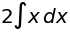

In [ ]:
from sympy import *
init_printing()
x = symbols ('x')
a = 2 * Integral (x, x)
a

`init_printing()`とすると、アウトプットが数式表示になる。

In [ ]:
latex(a)

'2 \\int x\\, dx'

`latex()`を使うと`latex`ソース表示になるので、マークダウンに使える。
</br></br>
$$
2 \int x \, dx
$$


`doit()`を使ってみよう。


In [ ]:
a.doit()

インテグラルは積分で`doit()`で積分を計算している、ということは`diff`かなにかで微分もできるのか。


やってみよう。


In [ ]:
diff(x**2)

In [4]:
(x ** 2).diff()

### 因数分解と式の展開

`factor()`と`expand()`だと思うのでやってみる。

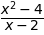

In [ ]:
from sympy import *
init_printing(use_unicode=True)

x = symbols ('x')
b = (x + 2) * (x - 2)
c = (x**2 - 4) / (x - 2)
display(b, c)

In [ ]:
display(factor (b))
display(factor (c))

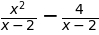

In [ ]:
display(expand (b))
display(expand (c))

In [ ]:
d = (x - 2)
b / d

式の因数分解や展開が全部自動化できるわけではない。

あたりまえだね。

### Rational()

In [ ]:
from sympy import *
Rational (3, 2)

In [ ]:
Rational(8, 4)

In [ ]:
sqrt(8)

数式のシンボルを事前に宣言する場合があるみたい。
```
x, y, z = symbols("x y z")
k, m, n = symbols("k m n", integer=True)
f, g, h = symbols('f g h', cls=Function)
```
意味は多分、`x, y, z`は任意の変数、`f, m, n`は整数、`f, g, h`は関数ということだと思うが、`i, j`がないね。

In [ ]:
import sympy
help(sympy.symbols)

いろいろやってみよう。

In [7]:
x

In [ ]:
sqrt(8)


2⋅√2

In [ ]:
exp(1)

ℯ

In [ ]:
log(x)

log(x)

In [ ]:
I

ⅈ

In [ ]:
Rational(3,2)*pi + exp(I*x) / (x**2 + y)

        ⅈ⋅x 
3⋅π    ℯ    
─── + ──────
 2     2    
      x  + y

###### Rational()の中で変数は使えなかった

In [ ]:
(x-1)**2 / (x - 1)

x - 1

In [ ]:
(x - 1) * (x + 1) / (x - 1)

x + 1

In [ ]:
(x**2 - 1) / (x - 1)

 2    
x  - 1
──────
x - 1 

### 数式の割り算とか

In [ ]:
(x**2 - 2 * x + 1) / (x - 1)

 2          
x  - 2⋅x + 1
────────────
   x - 1    

In [11]:
factor((x**2 - 2 * x + 1) / (x - 1))

In [9]:
factor ((x**2 - 2*x +1)) / (x - 1)

In [ ]:
pi

π

In [ ]:
pi.evalf()

3.14159265358979

In [14]:
E.evalf()

In [16]:
exp(1).evalf()

# ヘルプの求め方

`evalf()`の例ではｍ`evalf?`とか`evalf??`とかが簡単でよい。

`help(evalf)`もある。`help(x.evalf)`もある。

In [ ]:
evalf?
# Adaptive numerical evaluation of SymPy expressions, using mpmath
# for mathematical functions.

In [ ]:
exp(1).evalf()

2.71828182845905

In [ ]:
E.evalf()

2.71828182845905

In [ ]:
-oo.evalf()

-inf

In [ ]:
x + 2 * y

x + 2⋅y

In [ ]:
expr = x + 2 * y
expr

x + 2⋅y

In [ ]:
expr  - x + 1

2⋅y + 1

In [ ]:
x * expr

x⋅(x + 2⋅y)

# 式の簡素化

`simplification`というのか。自動でやられるのはごく単純な場合だけ。

sympyに`expand`と`factor`という関数がある。

In [ ]:
from sympy import *
init_printing(use_unicode=True)
x, y = symbols('x y')
expr = x + 2 * y
expand(x * expr)
factor (expand (x * expr))

In [10]:
init_printing(use_unicode=True)
expr = (x ** 2 - 4) / (x - 2)
factor (expr)

# いまここ

In [ ]:
from sympy import *
init_printing(use_unicode=True)
x, t, z, nu = symbols ('x t z nu')

expr = sin (x) * exp(x)
expr

In [ ]:
diff(expr, x)

In [ ]:
integrate (exp(x)*sin(x) + exp(x)*cos(x))

In [ ]:
integrate (exp(x)*(sin(x) + cos(x)))

In [ ]:
integrate(sin(x**2), (x, -oo, oo))

In [ ]:
limit (sin(x)/x, x, 0)

###### $ \sqrt 2 $ を100桁まで計算しましょう
って、これまでの知識でできるか？  
こういう問題を出すのって教科書が悪いよね。  
本文で説明できていないことを練習問題で細くしたい、という気持ちはわかるが独習者を無視している。  
ひょっとするとevalf(100)とかか？  
とりあえず、$ \sqrt 2 $ を式にしよう。

In [ ]:
pi.evalf(100)

3.1415926535897932384626433832795028841971693993751058209749445923078164062862
08998628034825342117068

In [ ]:
2**(1/2)

1.4142135623730951

In [19]:
sqrt(2).evalf(100)

In [ ]:
val = 2**(1/2)
print("{0:.100f}".format(val))

1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


In [ ]:
# これはエラーになる
# val = sqrt(2)
# print("{0:.100f}".format(val))

In [22]:
val = 2**(1/2)

In [ ]:
# 2**(1/2)はfloatなのでevalf()が使えない。exp表示にする必要がある
exp(ln(2) / 2).evalf(100)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621
07038850387534327641573

In [ ]:
###### 1/2+1/3を有理数として計算する
Rational(1,2)+Rational(1,3)

5/6

In [ ]:
x + x + y + x

3⋅x + y

###### init_printingについて、テキストによっていろんな初期化をしている
sympy.init_printing(use_unicode=False, wrap_line=True)  
とか  
init_printing()  
とか  
from sympy.interactive import printing  
printing.init_printing(use_latex='mathjax')  
とか  
init_printing(use_latex=True)  
とか  

In [ ]:
expand((x+y)**5)

 5      4         3  2       2  3        4    5
x  + 5⋅x ⋅y + 10⋅x ⋅y  + 10⋅x ⋅y  + 5⋅x⋅y  + y 

###### 変数入りの数式はベキが大きいのから小さいのに並べられるのはエラい

In [ ]:
3*x*y**2 + 3*y*x**2 + x**3 + y**3

 3      2          2    3
x  + 3⋅x ⋅y + 3⋅x⋅y  + y 

In [ ]:
expand(x + y, complex = True)

re(x) + re(y) + ⅈ⋅im(x) + ⅈ⋅im(y)

###### 上のは複素数表記でドイツ文字の$ R $と$ I $を使っている
フラクトゥールというらしい
$$
\mathfrak R (x) + \mathfrak R (y) + i \mathfrak I x + \mathfrak I y
$$
だいたい合っているかな。

In [23]:
'''
Unit converter: Miles and Kilometers
'''
def print_menu():
  print('1. Kilometers to Miles')
  print('2. Miles to Kilometers')

def km_miles():
  km = float(input('Enter distance in kilometers: '))
  miles = km / 1.609

  print('Distance in miles: {0}'.format(miles))

def miles_km():
  miles = float(input('Enter distance in miles: '))
  km = miles * 1.609
  print('Distance in kilometers: {0}'.format(km))

if __name__ == '__main__':
  print_menu()
  choice = input('Which conversion would you like to do?: ')
if choice == '1':
  km_miles()
if choice == '2':
  miles_km()

1. Kilometers to Miles
2. Miles to Kilometers
Which conversion would you like to do?: 1
Enter distance in kilometers: 10.0
Distance in miles: 6.215040397762586


### if __name__ == '__main__':
はノートブックにそぐわないみたい。  
取ってしまった方がいいみたい。  

そんなことを言えば、input()もノートブックにそぐわないみたい。  
input()があると評価がそのセルで止まってしまう。  
なるほど。

# いまここ

In [ ]:
'''
Quadratic equation root calculator
'''
def roots(a, b, c):
  D = (b*b - 4*a*c)**0.5
  x_1 = (-b + D)/(2*a)
  x_2 = (-b - D)/(2*a)
  print('x1: {0}'.format(x_1))
  print('x2: {0}'.format(x_2))

a, b, c = 1, 2, 1
roots(float(a), float(b), float(c))

###### (x+y)6 の展開形を計算しましょう。

In [ ]:
from sympy import *
init_printing()
x, y = symbols("x,y")

expand((x + y)**6)

In [ ]:
simplify(x**6 + 6*x**5*y)

###### python表記に戻す init_printing()にはどうしたらよいか
アイデアは   
init_printing(use_pythonformat: True)  
x**2  
とか

init_printing(pretty_print=False)

でした。

In [ ]:
init_printing(pretty_print=False)
x**2

x**2

In [ ]:
expand((x + y)**6)

x**6 + 6*x**5*y + 15*x**4*y**2 + 20*x**3*y**3 + 15*x**2*y**4 + 6*x*y**5 + y**6

In [ ]:
# sin(x)/cos(x)を簡単化しなさい
from sympy import *
init_printing()
x = symbols('x')
simplify(sin(x)/cos(x))

###### 簡単化とはいくぶん曖昧な用語です, そのためより目的を明確にした simplify の代替が存在します: powsimp (指数の簡単化), trigsimp (三角関数を含む数式), logcombine, radsimp, togeter.

In [ ]:
factor(x**2 + 2*x + 1)

In [ ]:
simplify(x**2 + 2*x + 2)

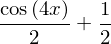

In [ ]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [ ]:
expand_trig(sin(x+y))

In [ ]:
trigsimp(sin(x)*cos(y)+sin(y)*cos(x))

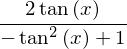

In [ ]:
expand_trig(tan(2*x))

In [ ]:
sqrt(x*y)

In [ ]:
ln(x)

In [ ]:
x, y = symbols('x y')
expand_log(log(x*y))

In [ ]:
x, y = symbols('x y', positive=True)
expand_log(log(x*y))

In [ ]:
x, y = symbols('x y')
expand_log(log(x*y), force=True)

In [ ]:
logcombine(log(x) + log(y), force=True)

In [ ]:
n=symbols('n')
logcombine(n*ln(x),force=True)

In [ ]:
x,y,z=symbols('x y z')
k, m, n = symbols('k m n')
factorial(n)

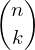

In [ ]:
binomial(n,k)

In [ ]:
binomial(5,3)

In [ ]:
gamma(z)

In [ ]:
gamma(10)

In [ ]:
factorial(9)

\Gamma(z) = \int_0^\infty t^{z - 1}e^{-t}\,dt 

$$
\Gamma(z) = \int_0^\infty t^{z - 1}e^{-t}\,dt
$$


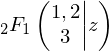

In [ ]:
# hyper([a_1, ..., a_p], [b_1, ..., b_q], z)
# hypergeometric function
hyper([1,2],[3],z)

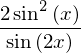

In [ ]:
# rewrite
tan(x).rewrite(sin)

In [ ]:
factorial(x).rewrite(gamma)
# For some tips on applying more targeted rewriting, see the Advanced Expression Manipulation section

In [ ]:
expand_func(gamma(x + 3))

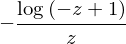

In [ ]:
hyperexpand(hyper([1,1],[2],z))

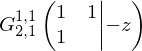

In [ ]:
expr = meijerg([[1],[1]], [[1],[]],-z)
expr

In [ ]:
hyperexpand(expr)

In [ ]:
n , k = symbols('n k', integer=True)
combsimp(factorial(n)/factorial(n - 3))

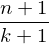

In [ ]:
combsimp(binomial(n+1, k+1)/binomial(n, k))

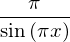

In [ ]:
gammasimp(gamma(x)*gamma(1 - x))

###### sympyのtutorial

In [ ]:
from sympy import *
x = symbols('x')
a = Integral(cos(x)*exp(x),x)
Eq(a, a.doit())

Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2)

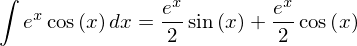

In [ ]:
from sympy import *
init_printing()
x = symbols('x')
a = Integral(cos(x)*exp(x),x)
Eq(a, a.doit())

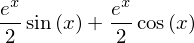

In [ ]:
a.doit()

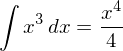

In [ ]:
b = Integral(x**3)
Eq(b, b.doit())

###### Sympy Tutorialに移りました

In [ ]:
from sympy import *
init_printing()
x, t, z, nu, y = symbols('x t z nu y')

diff(sin('x')*exp(x),x)

In [ ]:
diff(x**2)

In [ ]:
diff(sin('x')*exp(x))

In [ ]:
exp(x)

In [ ]:
exp(1)

In [ ]:
diff(exp(x))

In [ ]:
exp(1).evalf()

In [ ]:
expand_trig(sin(x + y))

In [ ]:
expand_trig(sin(2*x))

In [ ]:
expand_trig(cos(x + y))

In [ ]:
expand_trig(cos(2*x))

In [ ]:
expand_trig(sin(3*x))

In [ ]:
integrate(exp(x)*sin(x) + exp(x)*cos(x))

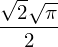

In [ ]:
integrate(sin(x**2),(x,-oo, oo))

In [ ]:
limit(sin(x)/x, x, 0)

In [ ]:
from sympy import *
init_printing()
x = symbols('x')
factor(x**2 - 2)

###### from sympy import *
init_printing()
x = symbols('x')
factor(x**2 - 2)

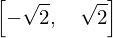

In [ ]:
solve(x**2 - 2, x)

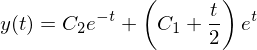

In [ ]:
# solve the differential equation y'' - y = e^t
from sympy import *
init_printing()
x, y ,z, t = symbols('x y z t')
y = Function('y')
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

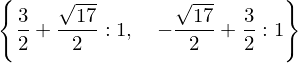

In [ ]:
Matrix([[1,2],[2,2]]).eigenvals()

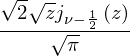

In [ ]:
from sympy import *
init_printing()
x, y ,z, nu, t = symbols('x y z nu t')

besselj(nu,z).rewrite(jn)

In [ ]:
latex(Integral(cos(x)**2,(x,0,pi)))

'\\int_{0}^{\\pi} \\cos^{2}{\\left (x \\right )}\\, dx'

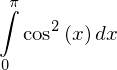

In [ ]:
Integral(cos(x)**2,(x,0,pi))

In [ ]:
from sympy import*
init_printing()
x = symbols('x')
expr = x + 1
expr.subs(x,2)

In [ ]:
Eq((x + 1)**2, x**2 + 2+x + 1)

In [ ]:
(x + 1)**2 == x**2 + 2+x + 1

False

In [ ]:
a = (x + 1)**2
b = x**2 + 2*x + 1
a

In [ ]:
a - b

In [ ]:
simplify(a - b)

In [ ]:
if simplify(a - b) == 0:
    print ("right")
else:
    print ("no")

right


In [ ]:
a.equals(b)

True

In [ ]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

In [ ]:
x^y

In [ ]:
type(Integer(1) + 1)

sympy.core.numbers.Integer

In [ ]:
type(1 +  1)

int

In [ ]:
Integer(3) / Integer(2)

In [ ]:
3/2

In [ ]:
from __future__ import division
1/2

In [ ]:
Rational(1,2)

In [ ]:
x  + 1/2

In [ ]:
from sympy import *
x, y, z = symbols('x y z')
expr = cos(x) + 1
expr.subs(x, y)

In [ ]:
expr.subs(x, 0)

In [ ]:
expr = x ** y
expr

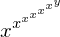

In [ ]:
expr = expr.subs(y, x**y)
expr


In [ ]:
expr = sin(2*x) + cos(2*x)
expand_trig(expr)

In [ ]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

###### multiple substituteion

In [ ]:
from sympy import*
init_printing()
x,y,z,t = symbols('x y z t')
expr = x**3 + 4*x*y - z
expr.subs([(x,2),(y,4),(z,0)])

In [ ]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
expr

In [ ]:
replacements = [(x**i, y**i) for i in range(5) if i % 2 ==0]
expr.subs(replacements)

###### sympify

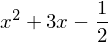

In [ ]:
str_expr = "x**2+ 3*x - 1/2"
expr = sympify(str_expr)
expr

In [ ]:
expr.subs(x,2)

###### evalf

In [ ]:
sqrt(8).evalf()

In [ ]:
E.evalf()

In [ ]:
pi.evalf(100)

In [ ]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

In [ ]:
expr.subs(x,2.4).evalf()

In [ ]:
one = cos(1)**2 + sin(1)**2
(one - 1).evalf(chop=True)

######  lambdify

In [ ]:
import numpy
a = numpy.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
a[3]

3

In [ ]:
expr = sin(x)
f = lambdify(x, expr, "numpy")
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [ ]:
f = lambdify(x, expr, "math")
f(0.1)

###### sympy_name:numerical_function pairs

In [ ]:
def mysin(x):
    """
    My sine. Note that this is only accurate for small x.
    """
    return x
f = lambdify(x, expr, {"sin":mysin})
f(0.1)

###### printing
str, srepr, ASCII pretty printer, Unicode pretty printer, LaTeX, MathML, Dot

init_session() works
1. frm sympy import *
2. init_printing()
3. common symbols


In [ ]:
from sympy import *
init_session()

IPython console for SymPy 1.2 (Python 3.6.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



###### continued fractions

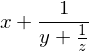

In [ ]:
from sympy import *
init_printing()
x,y,z = symbols('x y z')

def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1 / expr
    return l[0] + expr
frac = list_to_frac([x,y,z])
frac

In [ ]:
list_to_frac([1,2,3,4])

In [ ]:
syms = symbols('a0:5')
syms

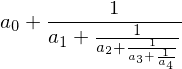

In [ ]:
a0, a1, a2, a3, a4 = syms

frac = list_to_frac(syms)
frac

###### cancel

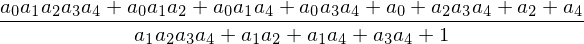

In [ ]:
frac=cancel(frac)
frac

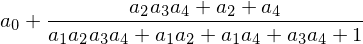

In [ ]:
l=[]
frac = apart(frac, a0)
frac

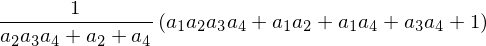

In [ ]:
l.append(a0)
frac = 1/(frac - a0)
frac

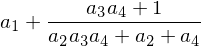

In [ ]:
frac = apart(frac, a1)
frac

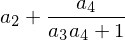

In [ ]:
l.append(a1)
frac = 1/(frac - a1)
frac = apart(frac, a2)
frac

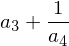

In [ ]:
l.append(a2)
frac = 1/(frac - a2)
frac = apart(frac, a3)
frac

In [ ]:
l.append(a3)
frac = 1/(frac - a3)
frac = apart(frac, a4)
frac

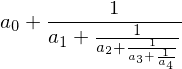

In [ ]:
l.append(a4)
list_to_frac(l)

In [ ]:
l

######  random

In [ ]:
import random
l = list(symbols('a0:5'))
random.shuffle(l)
orig_frac = frac = cancel(list_to_frac(l))
del l

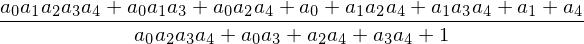

In [ ]:
frac

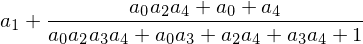

In [ ]:
l=[]
frac = apart(frac, a1)
frac

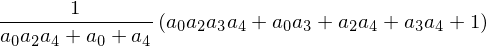

In [ ]:
l.append(a1)
frac = 1/(frac - a1)
frac

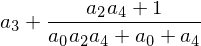

In [ ]:
frac = apart(frac, a3)
frac

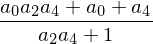

In [ ]:
l.append(a3)
frac = 1/(frac - a3)
frac

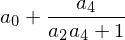

In [ ]:
frac = apart(frac, a0)
frac

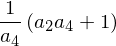

In [ ]:
l.append(a0)
frac = 1/(frac - a0)
frac

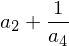

In [ ]:
frac = apart(frac, a2)
frac

In [ ]:
l.append(a2)
frac = 1/(frac - a2)
frac

In [ ]:
frac = apart(frac, a4)
frac

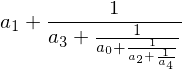

In [ ]:
l.append(a4)
list_to_frac(l)

In [ ]:
l

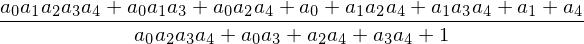

In [ ]:
orig_frac

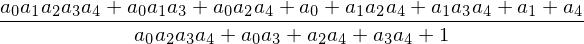

In [ ]:
cancel(list_to_frac(l))

######  end of file mathwithpython01